In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from skimage.color import gray2rgb
from skimage import img_as_float, img_as_ubyte, img_as_uint

In [2]:
train_df = pd.read_csv("data/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("data/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train_df['label'].values
test_labels = test_df['label'].values

In [5]:
train_df.drop('label', axis = 1, inplace = True)
images = train_df.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [6]:
test_df.drop('label', axis = 1, inplace = True)
test_images = test_df.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [7]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
y_test = label_binrizer.fit_transform(test_labels)

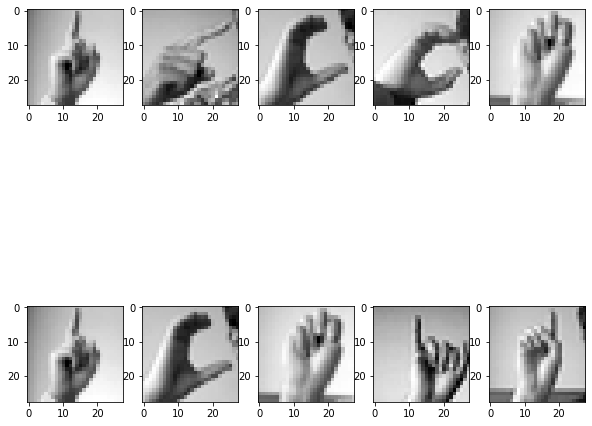

In [8]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*j+j].reshape(28, 28) , cmap = "gray")

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size = 0.3, random_state = 42)

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [11]:
def create_3_level_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.20))
    model.add(Dense(24, activation = 'softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
def evaluate_model(model, train_iter, validation_iter, test_iter, epochs=None, max_epochs=50, early_stopping=None):
    callbacks=[]
    if early_stopping:
        callbacks.append(early_stopping)
    elif not epochs:
        callbacks.append(EarlyStopping(monitor='val_accuracy', mode='max', patience=5))
    history = model.fit(
        train_iter, epochs=epochs if epochs else max_epochs, verbose=1,
        validation_data=validation_iter, callbacks=callbacks)
    loss, accuracy= model.evaluate(test_iter, verbose=1)
    print(f"Model loss={loss}, accuracy={accuracy}")
    return history

In [13]:
def plot_history(history):
    plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    plt.subplot(211)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.subplot(212)
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
model_1=create_3_level_model()
history=evaluate_model(model_1, 
                       train_datagen.flow(x_train,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid, y_valid), 
                       test_datagen.flow(x_test, y_test))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/50
151/151 [==============================] - 6s 37ms/step - loss: 2.4202 - accuracy: 0.2607 - val_loss: 1.2584 - val_accuracy: 0.6296
Epoch 2/50
151/151 [==============================] - 5s 35ms/step - loss: 1.0020 - accuracy: 0.6651 - val_loss: 0.6032 - val_accuracy: 0.8280
Epoch 3/50
151/151 [==============================] - 5s 35ms/step - loss: 0.5670 - accuracy: 0.8077 - val_loss: 0.3534 - val_accuracy: 0.8975
Epoch 4/50
151/151 [==============================] - 5s 35ms/step - loss: 0.3491 - accuracy: 0.8870 - val_loss: 0.2427 - val_accuracy: 0.9269
Epoch 5/50
151/151 [==============================] - 5s 35ms/step - loss: 0.2324 - accuracy: 0.9248 - val_loss: 0.1101 - val_accuracy: 0.9773
Epoch 6/50
151/151 [==============================] - 5s 34ms/step - loss: 0.1415 - accuracy: 0.9576 - val_loss: 0.0684 - val_accuracy: 0.9847
Epoch 7/50
151/151 [============================

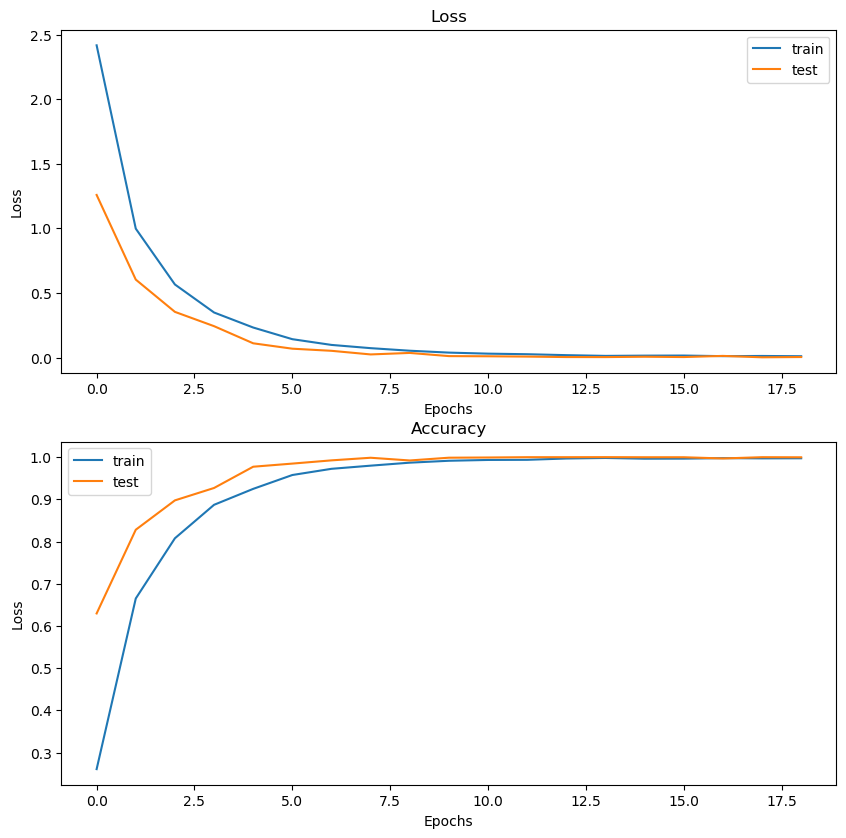

In [16]:
plot_history(history)

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    zca_whitening=False,
    rotation_range=20,  
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [18]:
history=evaluate_model(model_1, 
                       train_datagen.flow(x_train,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid, y_valid), 
                       test_datagen.flow(x_test, y_test))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/50
151/151 [==============================] - 7s 44ms/step - loss: 1.0623 - accuracy: 0.6716 - val_loss: 0.1540 - val_accuracy: 0.9780
Epoch 2/50
151/151 [==============================] - 7s 44ms/step - loss: 0.6742 - accuracy: 0.7764 - val_loss: 0.1261 - val_accuracy: 0.9677
Epoch 3/50
151/151 [==============================] - 7s 43ms/step - loss: 0.5409 - accuracy: 0.8214 - val_loss: 0.1096 - val_accuracy: 0.9724
Epoch 4/50
151/151 [==============================] - 7s 44ms/step - loss: 0.4716 - accuracy: 0.8408 - val_loss: 0.0671 - val_accuracy: 0.9870
Epoch 5/50
151/151 [==============================] - 6s 42ms/step - loss: 0.4106 - accuracy: 0.8592 - val_loss: 0.0606 - val_accuracy: 0.9870
Epoch 6/50
151/151 [==============================] - 7s 43ms/step - loss: 0.3585 - accuracy: 0.8782 - val_loss: 0.0794 - val_accuracy: 0.9757
Epoch 7/50
151/151 [============================

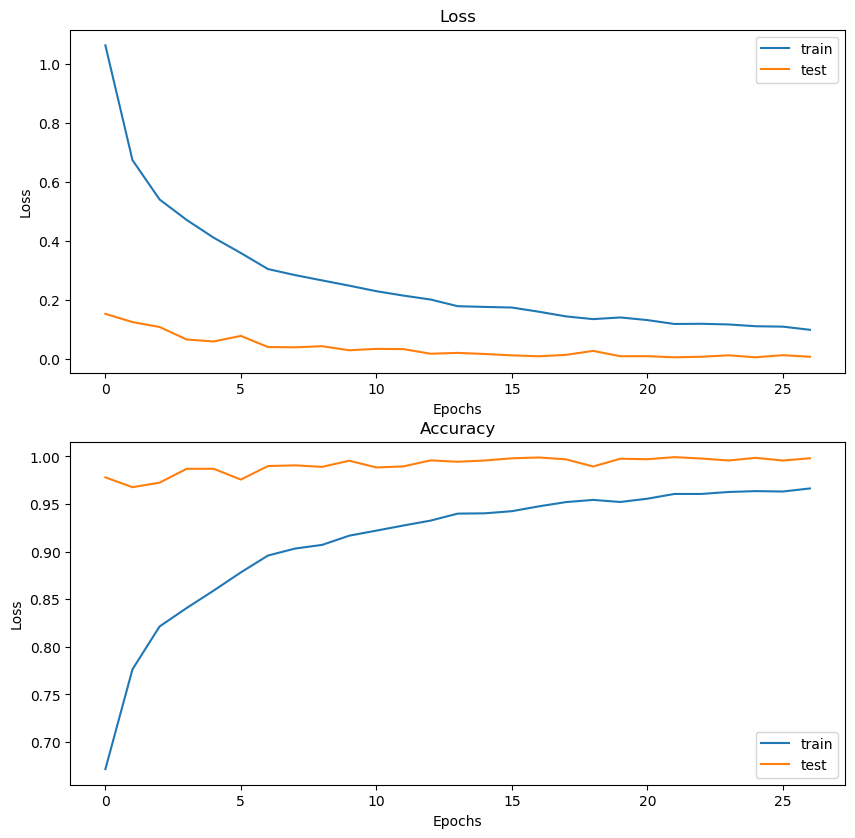

In [19]:
plot_history(history)

In [14]:
def add_fully_connected_layers(pre_trainded_model, dropout=0.2, layer_output_idx=1):
    for layer in pre_trainded_model.layers:
        layer.trainable = False
    x = Flatten()(pre_trainded_model.layers[layer_output_idx].output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(24, activation='softmax')(x)
    model = Model(inputs=pre_trainded_model.input, outputs=x)
    model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

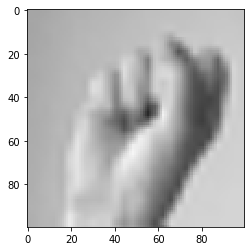

In [15]:
def convert_to_rgb(image, target_size=(100, 100)):
    return resize(gray2rgb(img_as_ubyte(image.reshape(image.shape[0], image.shape[1])/255)), target_size)
img=x_train[2, :, :]
img=convert_to_rgb(img.reshape(28,28))
plt.figure()
plt.imshow(img)

In [16]:
def convert_data_to_rgb(data, target_size):
    result=np.zeros((data.shape[0], target_size[0], target_size[1], 3))
    for i in range(data.shape[0]):
        result[i, :]=convert_to_rgb(data[i, :], target_size=target_size)
    return result
x_train_rgb=convert_data_to_rgb(x_train, target_size=(100, 100))
x_valid_rgb=convert_data_to_rgb(x_valid, target_size=(100, 100))
x_test_rgb=convert_data_to_rgb(x_test, target_size=(100, 100))

In [17]:
train_datagen = ImageDataGenerator()
validation_datagen=ImageDataGenerator()
test_datagen=ImageDataGenerator()

In [18]:
model_vgg = add_fully_connected_layers(VGG16(include_top=False, input_shape=(100, 100, 3)), layer_output_idx=-2)
history=evaluate_model(model_vgg,
                       train_datagen.flow(x_train_rgb,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid_rgb, y_valid), 
                       test_datagen.flow(x_test_rgb, y_test),
                       epochs=5
                      )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/5
151/151 [==============================] - 469s 3s/step - loss: 0.8186 - accuracy: 0.8217 - val_loss: 0.1922 - val_accuracy: 0.9803
Epoch 2/5
151/151 [==============================] - 470s 3s/step - loss: 0.1256 - accuracy: 0.9833 - val_loss: 0.0677 - val_accuracy: 0.9891
Epoch 3/5
151/151 [==============================] - 483s 3s/step - loss: 0.0422 - accuracy: 0.9951 - val_loss: 0.0226 - val_accuracy: 0.9983
Epoch 4/5
151/151 [==============================] - 467s 3s/step - loss: 0.0181 - accuracy: 0.9986 - val_loss: 0.0080 - val_accuracy: 0.9995
Epoch 5/5
151/151 [==============================] - 448s 3s/step - loss: 0.0093 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9999
  ...
    to  
  ['...']
225/225 [==============================] - 114s 508ms/step - loss: 0.0313 - accuracy: 0.9932
Model loss=0.031345389526233905, accuracy=0.9931678771972656


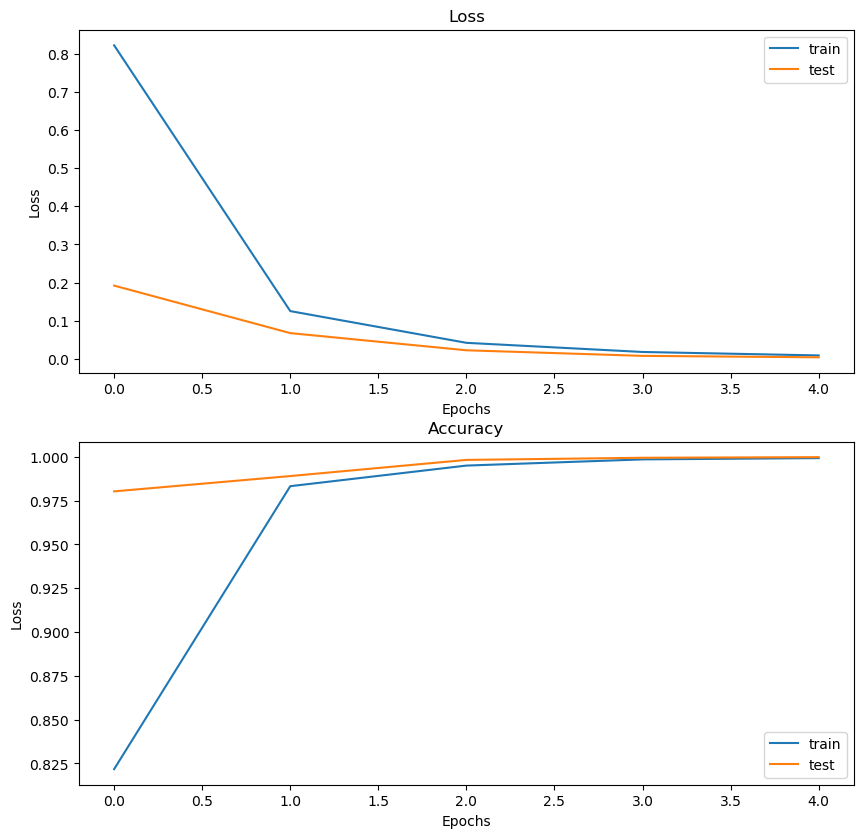

In [19]:
plot_history(history)

In [18]:
model_inception_resnet=add_fully_connected_layers(InceptionResNetV2(include_top=False, input_shape=(100, 100, 3)), layer_output_idx=25,dropout=0.3)
history=evaluate_model(model_inception_resnet,
                       train_datagen.flow(x_train_rgb,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid_rgb, y_valid), 
                       test_datagen.flow(x_test_rgb, y_test),
                       epochs=6)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/6
151/151 [==============================] - 97s 640ms/step - loss: 0.6584 - accuracy: 0.8237 - val_loss: 0.3415 - val_accuracy: 0.9187
Epoch 2/6
151/151 [==============================] - 89s 592ms/step - loss: 0.0539 - accuracy: 0.9914 - val_loss: 0.1446 - val_accuracy: 0.9723
Epoch 3/6
151/151 [==============================] - 89s 591ms/step - loss: 0.0123 - accuracy: 0.9990 - val_loss: 0.0655 - val_accuracy: 0.9881
Epoch 4/6
151/151 [==============================] - 93s 618ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0731 - val_accuracy: 0.9863
Epoch 5/6
151/151 [==============================] - 95s 627ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0930 - val_accuracy: 0.9699
Epoch 6/6
151/151 [==============================] - 93s 617ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0452 - val_accuracy: 0.9883
  ...
    to  
  ['...']
225/225 [========

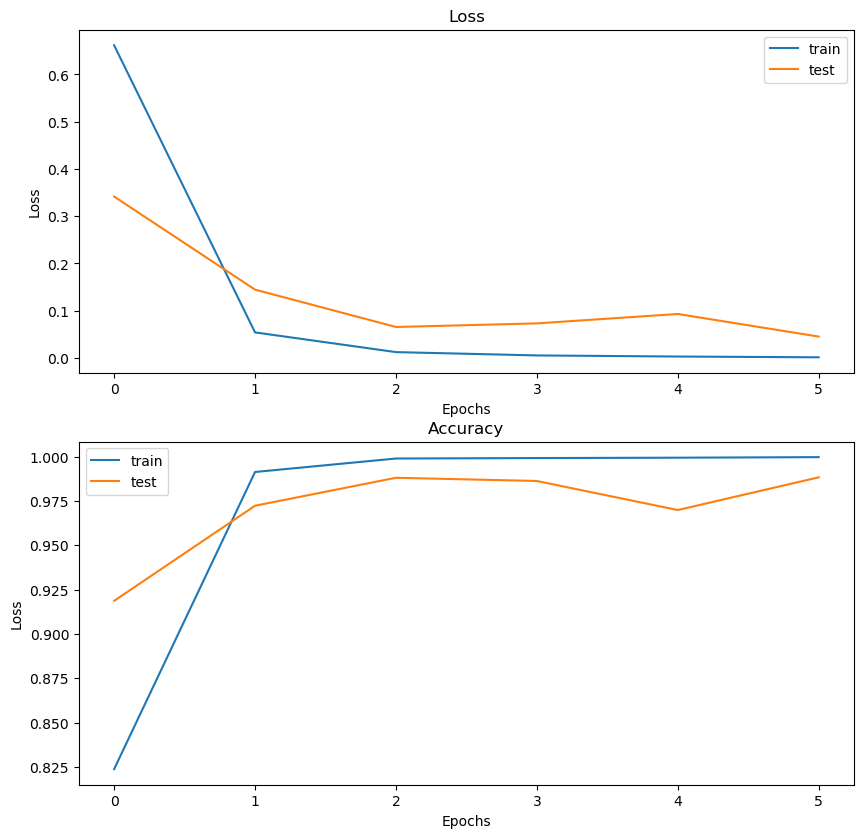

In [19]:
plot_history(history)

In [18]:
model_inception=add_fully_connected_layers(InceptionV3(include_top=False, input_shape=(100, 100, 3)), layer_output_idx=20, dropout=0.3)
history=evaluate_model(model_inception,
                       train_datagen.flow(x_train_rgb,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid_rgb, y_valid), 
                       test_datagen.flow(x_test_rgb, y_test),
                       epochs=8)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/8
151/151 [==============================] - 87s 575ms/step - loss: 0.6283 - accuracy: 0.8282 - val_loss: 0.4548 - val_accuracy: 0.9008
Epoch 2/8
151/151 [==============================] - 86s 570ms/step - loss: 0.0462 - accuracy: 0.9905 - val_loss: 0.3173 - val_accuracy: 0.9187
Epoch 3/8
151/151 [==============================] - 86s 571ms/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 0.1508 - val_accuracy: 0.9679
Epoch 4/8
151/151 [==============================] - 85s 565ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.1768 - val_accuracy: 0.9523
Epoch 5/8
151/151 [==============================] - 84s 559ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.1200 - val_accuracy: 0.9739
Epoch 6/8
151/151 [==============================] - 85s 560ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1295 - val_accuracy: 0.9643
Epoch 7/8
151/151 [=======================

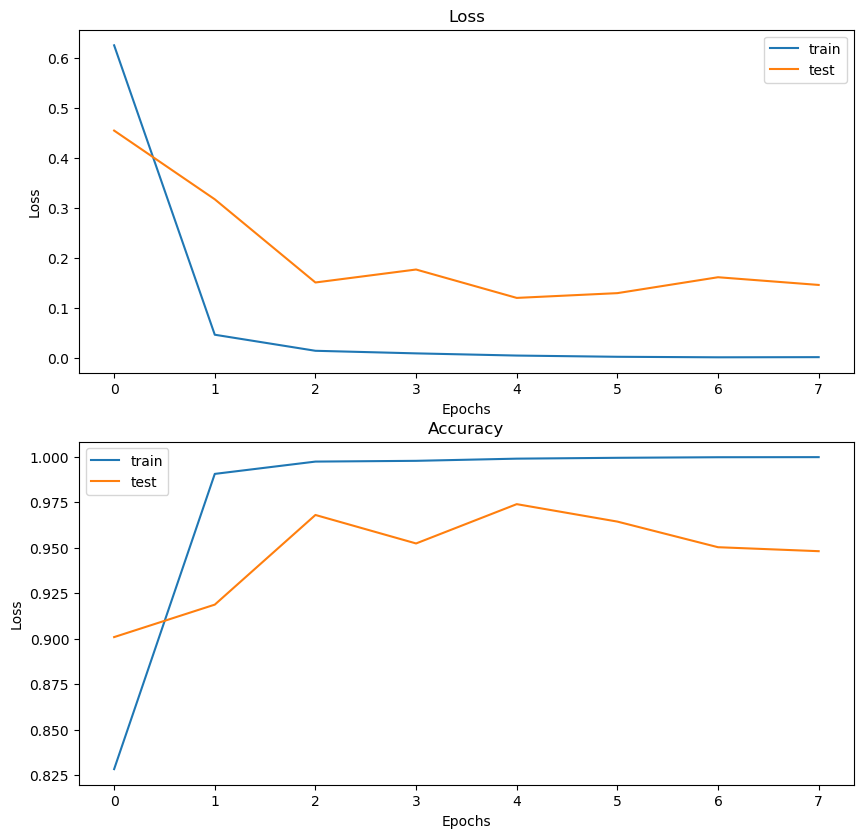

In [19]:
plot_history(history)

In [23]:
model_resnet=add_fully_connected_layers(ResNet50V2(include_top=False, input_shape=(100, 100, 3)), layer_output_idx=20, dropout=0.35)
history=evaluate_model(model_resnet,
                       train_datagen.flow(x_train_rgb,y_train, batch_size = 128),
                       validation_datagen.flow(x_valid_rgb, y_valid), 
                       test_datagen.flow(x_test_rgb, y_test),
                       epochs=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 151 steps, validate for 258 steps
Epoch 1/8
151/151 [==============================] - 120s 794ms/step - loss: 4.2892 - accuracy: 0.3954 - val_loss: 1.4705 - val_accuracy: 0.5712
Epoch 2/8
151/151 [==============================] - 115s 763ms/step - loss: 0.8600 - accuracy: 0.7368 - val_loss: 1.8506 - val_accuracy: 0.4275
Epoch 3/8
151/151 [==============================] - 115s 761ms/step - loss: 0.4685 - accuracy: 0.8506 - val_loss: 1.1233 - val_accuracy: 0.6643
Epoch 4/8
151/151 [==============================] - 115s 764ms/step - loss: 0.2874 - accuracy: 0.9070 - val_loss: 0.7462 - val_accuracy: 0.7595
Epoch 5/8
151/151 [==============================] - 113s 751ms/step - loss: 0.2354 - accuracy: 0.9313 - val_loss: 0.7279 - val_accuracy: 0.7508
Epoch 6/8
151/151 [==============================] - 127s 842ms/step - loss: 0.1529 - accuracy: 0.9537 - val_loss: 0.8590 - val_accuracy: 0.7318
Epoch 7/8
151/151 [=================

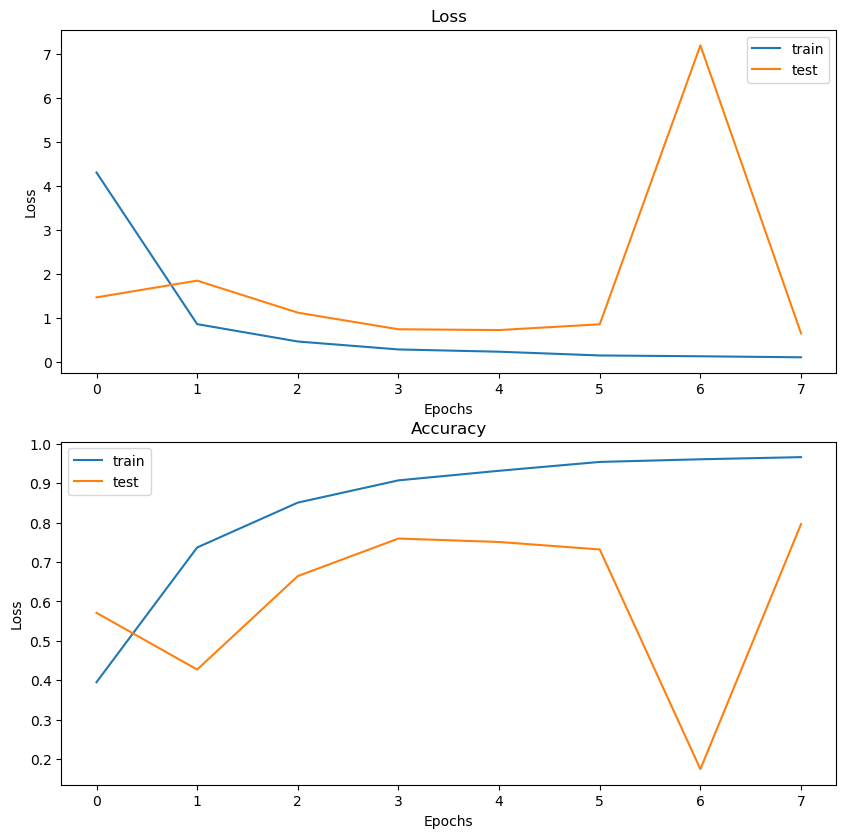

In [24]:
plot_history(history)